**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

\NOMBRE DEL PARTICIPANTE: ------------------------------ALAIN EDUARDO ZAZUETA VALENZUELA-----------------------------

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [4]:
from google.colab import drive
drive.mount('/content/drive')
happiness = pd.read_csv('/content/drive/MyDrive/THE LEARNING GATE/VISUALIZACION DE DATOS CON PYTHON/happiness_report.csv')
happiness

Mounted at /content/drive


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice.

In [5]:
mexico = happiness[happiness['Country or region'] == 'Mexico']
mexico = mexico.set_index('Country or region')
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

Text(0.5, 1.0, 'World Happiness Report')

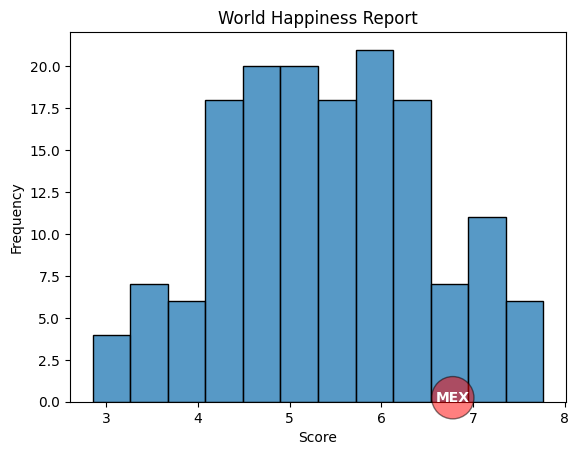

In [6]:
sns.histplot(x='Score', data=happiness, bins=12)
plt.ylabel('Frequency')
plt.text(mexico['Score'], 0, 'MEX', fontweight='bold', color='white', bbox=dict(facecolor='red', alpha=0.5, boxstyle='circle'))
plt.title('World Happiness Report')

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

Text(1.2, Country or region
Mexico    1.061
Name: Healthy life expectancy, dtype: float64, 'MEX')

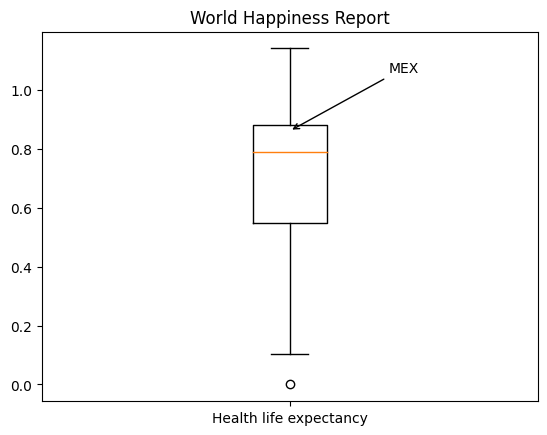

In [7]:
#sns.boxplot(y='Healthy life expectancy', data=happiness, orient='h')
plt.boxplot(happiness['Healthy life expectancy'].dropna(), labels=['Health life expectancy'])
plt.title('World Happiness Report')
plt.annotate('MEX', xy=(1,mexico['Healthy life expectancy']), xytext=(1.2,mexico['Healthy life expectancy']+0.2),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

In [8]:
#mexico = mexico.drop(['Overall rank'], axis=1)
mexico_t = mexico.T
mexico_t = mexico_t.drop(['Overall rank', 'Score'], axis=0)
mexico_t.rename(columns={'Mexico':'Factors'}, inplace=True)


In [9]:
mexico_t.index.name='index'
mexico_t.columns = ['Factors']
mexico_t

,Factors
index,
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


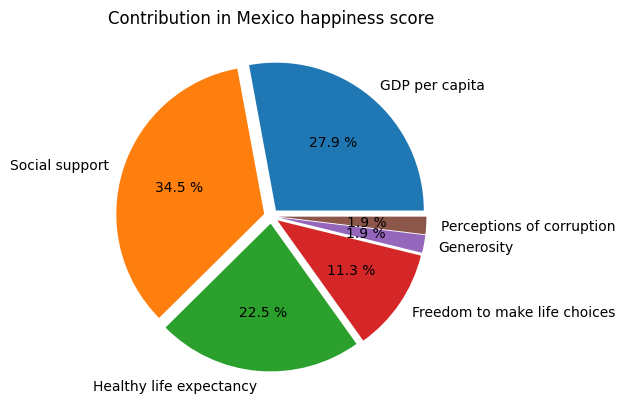

In [10]:
desfase=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(mexico_t['Factors'], labels=mexico_t.index, autopct="%0.1f %%", explode=desfase)
plt.title('Contribution in Mexico happiness score')
plt.show()

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

In [11]:
dato1 = happiness[happiness['Score'] == happiness['Score'].max()]  #El país más felíz
dato2 = happiness[happiness['Score'] == happiness['Score'].min()]   #El país menos felíz
dato3 = happiness[happiness['Country or region'] == 'Mexico']       #Mexico
                                                                    #El país con mayor expectativa de vida
dato4 = happiness[happiness['Healthy life expectancy'] == happiness['Healthy life expectancy'].max()]
                                                                    #El país con mayor soporte social
dato5 = happiness[happiness['Social support'] == happiness['Social support'].max()]
lst = [dato1, dato2, dato3, dato4, dato5]
filtrado = pd.concat(lst, ignore_index=True)
filtrado

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091
2,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073
3,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
4,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118


In [12]:
filtrado.T

,0,1,2,3,4
Overall rank,1,156,23,34,4
Country or region,Finland,South Sudan,Mexico,Singapore,Iceland
Score,7.769,2.853,6.595,6.262,7.494
GDP per capita,1.34,0.306,1.07,1.572,1.38
Social support,1.587,0.575,1.323,1.463,1.624
Healthy life expectancy,0.986,0.295,0.861,1.141,1.026
Freedom to make life choices,0.596,0.01,0.433,0.556,0.591
Generosity,0.153,0.202,0.074,0.271,0.354
Perceptions of corruption,0.393,0.091,0.073,0.453,0.118


In [13]:
filtrado = filtrado.T
filtrado.rename(columns={0:filtrado.loc['Country or region', 0], 1:filtrado.loc['Country or region', 1],
                         2:filtrado.loc['Country or region', 2], 3:filtrado.loc['Country or region', 3],
                         4:filtrado.loc['Country or region', 4]}, inplace=True)
filtrado = filtrado.drop(['Country or region', 'Overall rank', 'Score'], axis=0)
filtrado

,Finland,South Sudan,Mexico,Singapore,Iceland
GDP per capita,1.34,0.306,1.07,1.572,1.38
Social support,1.587,0.575,1.323,1.463,1.624
Healthy life expectancy,0.986,0.295,0.861,1.141,1.026
Freedom to make life choices,0.596,0.01,0.433,0.556,0.591
Generosity,0.153,0.202,0.074,0.271,0.354
Perceptions of corruption,0.393,0.091,0.073,0.453,0.118


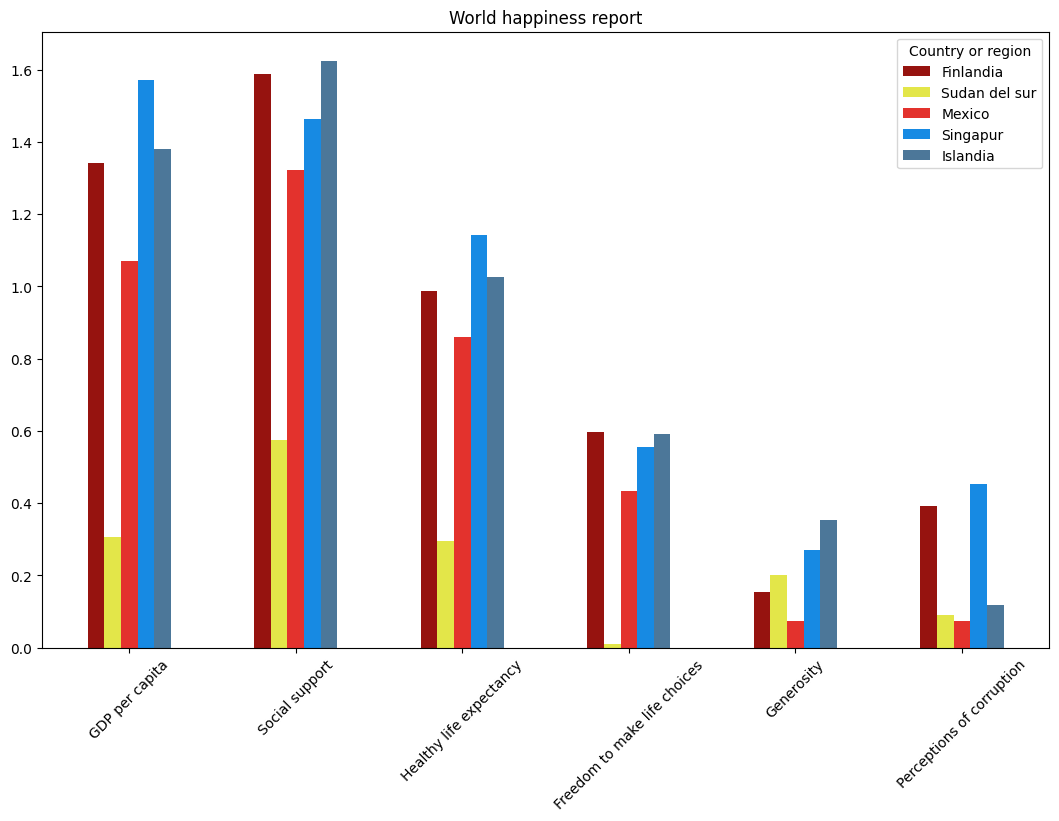

In [24]:
import numpy as np

n = len(filtrado.index)
x = np.arange(n)
width = 0.1
colors = ['#96130F', '#E3E649', '#E3322D', '#178AE3', '#4C7799']
plt.figure(figsize=(13,8))
plt.bar(x - (2*width), filtrado.Finland, width=width, label='Finlandia', color = colors[0])
plt.bar(x - width, filtrado['South Sudan'], width=width, label='Sudan del sur', color = colors[1])
plt.bar(x, filtrado.Mexico, width=width, label='Mexico', color = colors[2])
plt.bar(x + width, filtrado.Singapore, width=width, label='Singapur', color = colors[3])
plt.bar(x + (2*width), filtrado.Iceland, width=width, label='Islandia', color=colors[4])
plt.xticks(x, filtrado.index, rotation=45)
plt.legend(title='Country or region', loc='upper right' )
plt.title('World happiness report')
plt.show()

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

<Axes: xlabel='Score', ylabel='Perceptions of corruption'>

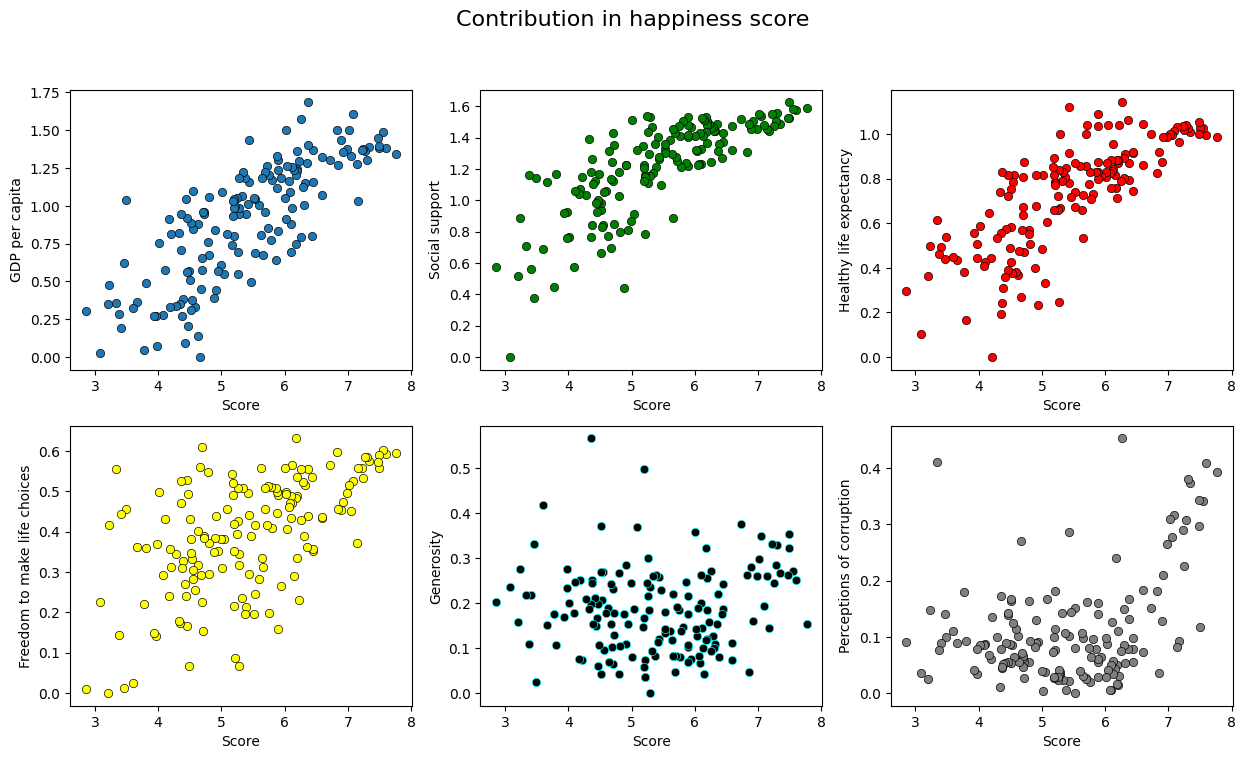

In [32]:
fig, axs = plt.subplots(2, 3, figsize=(15,8))
#axs[0,0].scatter(x=happiness['Score'], y=happiness['GDP per capita'])
fig.suptitle('Contribution in happiness score', fontsize=16)
sns.scatterplot(x='Score', y='GDP per capita', data=happiness, ax=axs[0,0], edgecolor='black')
sns.scatterplot(x='Score', y='Social support', data=happiness, ax=axs[0,1], color='green', edgecolor='black')
sns.scatterplot(x='Score', y='Healthy life expectancy', data=happiness, ax=axs[0,2], color='red', edgecolor='black')
sns.scatterplot(x='Score', y='Freedom to make life choices', data=happiness, ax=axs[1,0], color='yellow', edgecolor='black')
sns.scatterplot(x='Score', y='Generosity', data=happiness, ax=axs[1,1], color='black', edgecolor='cyan')
sns.scatterplot(x='Score', y='Perceptions of corruption', data=happiness, ax=axs[1,2], color='gray', edgecolor='black')

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

In [16]:
happiness_c = happiness.drop(['Country or region'], axis=1)
happiness_c.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [17]:
happiness_c.columns

Index(['Overall rank', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

<Axes: >

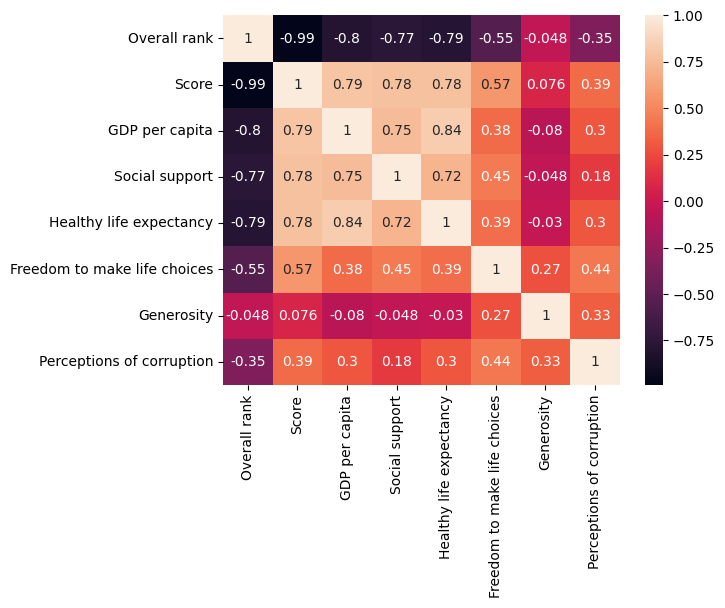

In [18]:
corr_happiness = happiness_c.corr()
#corr_happiness = corr_happiness.round(decimals=2)
#corr_happiness.style.background_gradient(cmap='afmhot')
sns.heatmap(corr_happiness, annot=True)

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región.

In [19]:
meta = pd.read_csv('/content/drive/MyDrive/THE LEARNING GATE/VISUALIZACION DE DATOS CON PYTHON/Metadata.csv')
meta

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra
...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


In [20]:
merge = pd.merge(happiness,meta, how='inner', left_on='Country or region', right_on='TableName')
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 135
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  136 non-null    int64  
 1   Country or region             136 non-null    object 
 2   Score                         136 non-null    float64
 3   GDP per capita                136 non-null    float64
 4   Social support                136 non-null    float64
 5   Healthy life expectancy       136 non-null    float64
 6   Freedom to make life choices  136 non-null    float64
 7   Generosity                    136 non-null    float64
 8   Perceptions of corruption     136 non-null    float64
 9   Country Code                  136 non-null    object 
 10  Region                        136 non-null    object 
 11  IncomeGroup                   136 non-null    object 
 12  SpecialNotes                  46 non-null     object 
 13  Table

In [21]:
merge

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FIN,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Finland
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DNK,Europe & Central Asia,High income,NaN,Denmark
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NOR,Europe & Central Asia,High income,NaN,Norway
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,ISL,Europe & Central Asia,High income,NaN,Iceland
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NLD,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,RWA,Sub-Saharan Africa,Low income,NaN,Rwanda
132,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,TZA,Sub-Saharan Africa,Lower middle income,NaN,Tanzania
133,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,AFG,South Asia,Low income,NaN,Afghanistan
134,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,CAF,Sub-Saharan Africa,Low income,NaN,Central African Republic


In [22]:
region = pd.DataFrame(merge.groupby(['Region'])['Score'].mean())
region

,Score
Region,
East Asia & Pacific,5.658769
Europe & Central Asia,6.104174
Latin America & Caribbean,6.007579
Middle East & North Africa,5.757429
North America,7.085000
South Asia,4.526857
Sub-Saharan Africa,4.260000


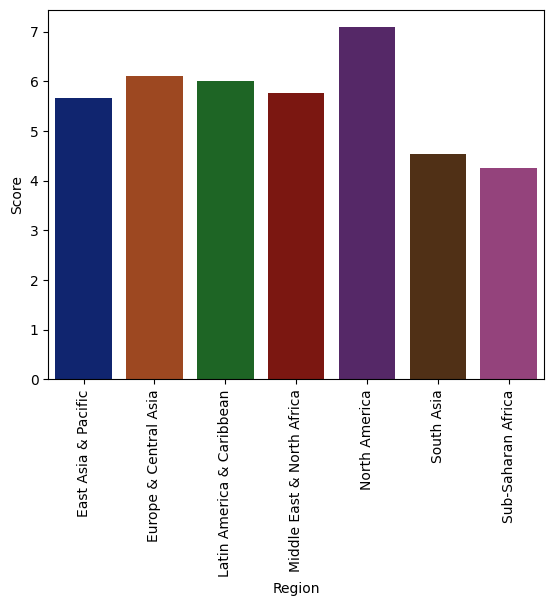

In [35]:
sns.barplot(x=region.index, y=region['Score'], palette='dark')
plt.tick_params(axis='x', rotation=90)